# Импорт необходимых библиотек:

In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import accumulate

# Загрузка данных:

In [251]:
df = pd.read_excel(r"C:\Users\danii\projects\test_task_Topface Media\data.xlsx")
print('Общая информация:')
df.info()
print('Первые 5 строк датафрейма:')
df.head()

Общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   client_id       724 non-null    float64
 1   sum             724 non-null    float64
 2   status          730 non-null    object 
 3   sale            724 non-null    object 
 4   new/current     724 non-null    object 
 5   Unnamed: 5      0 non-null      float64
 6   document        709 non-null    object 
 7   receiving_date  607 non-null    object 
dtypes: float64(3), object(5)
memory usage: 45.8+ KB
Первые 5 строк датафрейма:


,client_id,sum,status,sale,new/current,Unnamed: 5,document,receiving_date
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN,NaN
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,NaN,-,-
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,NaN,оригинал,2021-07-26 00:00:00
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00


# Предобработка данных

## Удаление лишних стобцов и значений, поиск аномальных значений

In [252]:
df = df.drop('Unnamed: 5', axis = 1)

In [253]:
df['status'].unique()

array(['Май 2021', 'ВНУТРЕННИЙ', 'ОПЛАЧЕНО', 'ПРОСРОЧЕНО', 'Июнь 2021',
       'Июль 2021', 'Август 2021', 'В РАБОТЕ', 'Сентябрь 2021',
       'Октябрь 2021', 'НА ПОДПИСАНИИ'], dtype=object)

Добавления нового столбца с описанием месяца сделки:

In [254]:
months = pd.Series(['Май 2021', 'Июнь 2021', 'Июль 2021', 'Август 2021', 'Сентябрь 2021', 'Октябрь 2021'])
index_month = [5, 6, 7, 8, 9, 10]
for n in range(len(months)):
    for i in range(len(df)):
        if df.loc[i, 'status'] == months[n]:
                df.loc[i:, 'month'] = pd.to_datetime(str(index_month[n]) + '-2021', format = '%m-%Y')

C:\Users\danii\AppData\Local\Temp\ipykernel_1872\4081947336.py:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[i:, 'month'] = pd.to_datetime(str(index_month[n]) + '-2021', format = '%m-%Y')


In [255]:
df = df[df['status'].isin(['ОПЛАЧЕНО', 'ПРОСРОЧЕНО', 'В РАБОТЕ', 'НА ПОДПИСАНИИ'])]


In [256]:
df['sale'].unique()

array(['Петрова', 'Иванов', 'Кузнецова', 'Андреев', 'Филимонова',
       'Селиванов', 'Смирнов', 'Васильев', 'Соколов', 'Михайлов', 'Попов'],
      dtype=object)

In [257]:
df['new/current'].unique()

array(['новая', 'текущая'], dtype=object)

In [258]:
df['document'].unique()

array(['оригинал', nan, 'НЕТ'], dtype=object)

## Приведение данных к необходимому формату

In [259]:
df['receiving_date'] = pd.to_datetime(df['receiving_date'], format='%Y-%m-%d %H:%M:%S')

В условиях задачи не указывается необходимость обработки пропусков, поэтому данный шаг пропускается.

# Вопросы

## 1. Вычислите общую выручку за июль 2021 по тем сделкам, приход денежных средств которых не просрочен.

In [260]:
print('Общая выручка за июль 2021 по тем сделкам, приход денежных средств которых не просрочен:')
df.loc[(df['status'] != "ПРОСРОЧЕНО") & (df['month'].dt.month == 7), 'sum'].sum().round()

Общая выручка за июль 2021 по тем сделкам, приход денежных средств которых не просрочен:


859896.0

## 2. Как изменялась выручка компании за рассматриваемый период? Проиллюстрируйте графиком.

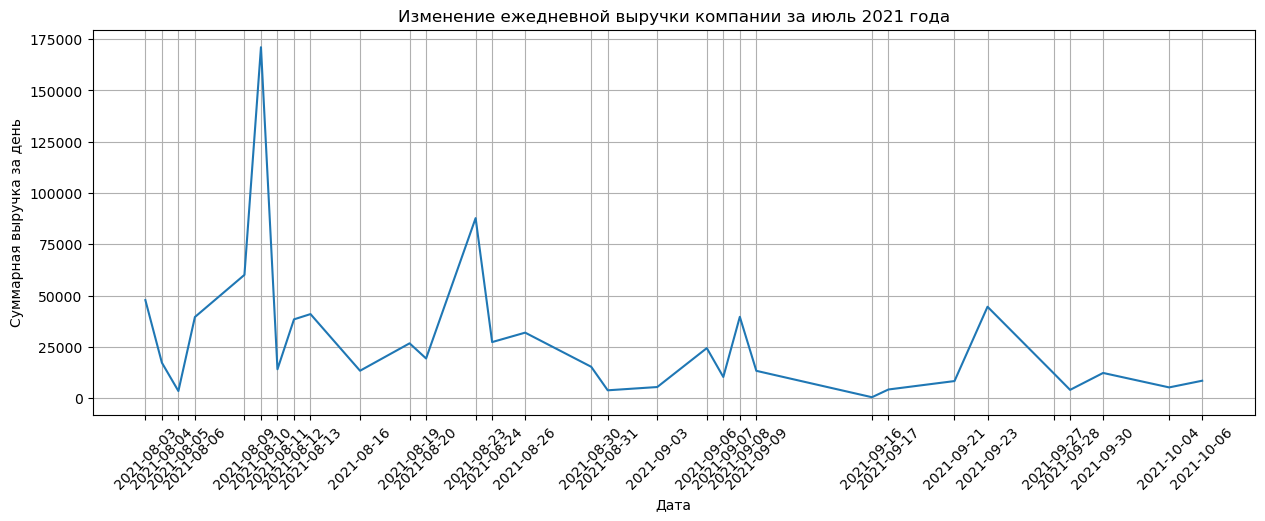

In [261]:
sum_month = df[(df['status'] != "ПРОСРОЧЕНО") & (df['month'].dt.month == 7)].groupby('receiving_date')['sum'].sum()
plt.figure(figsize = (15, 5))
plt.plot(sum_month)
plt.xticks(sum_month.index, rotation=45)
plt.grid(True)
plt.title('Изменение ежедневной выручки компании за июль 2021 года')
plt.xlabel('Дата')
plt.ylabel('Суммарная выручка за день')
plt.show()

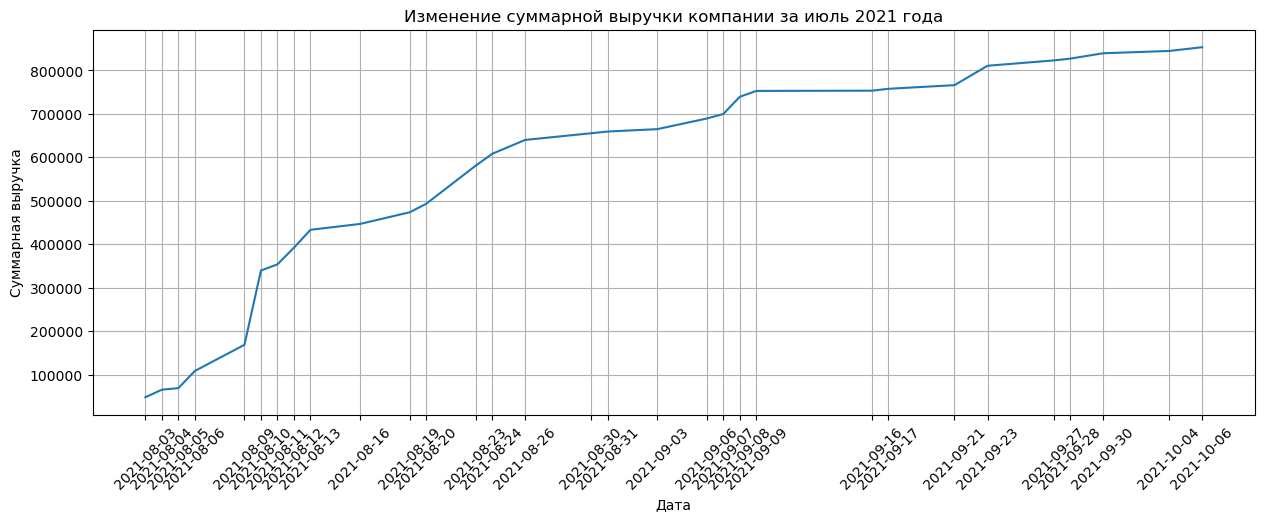

In [262]:
com_month_sum = pd.DataFrame(accumulate(sum_month), index = sum_month.index)
plt.figure(figsize = (15, 5))
plt.plot(com_month_sum)
plt.xticks(com_month_sum.index, rotation = 45)
plt.grid(True)
plt.title('Изменение суммарной выручки компании за июль 2021 года')
plt.xlabel('Дата')
plt.ylabel('Суммарная выручка')
plt.show()

На графиках проиллюстрировано, как меняется значение суммарной выручки за день в течение месяца. Также построен график, отображающий рост суммарной выручки компании за рассматриваемый период.

## 3. Кто из менеджеров привлек для компании больше всего денежных средств в сентябре 2021?

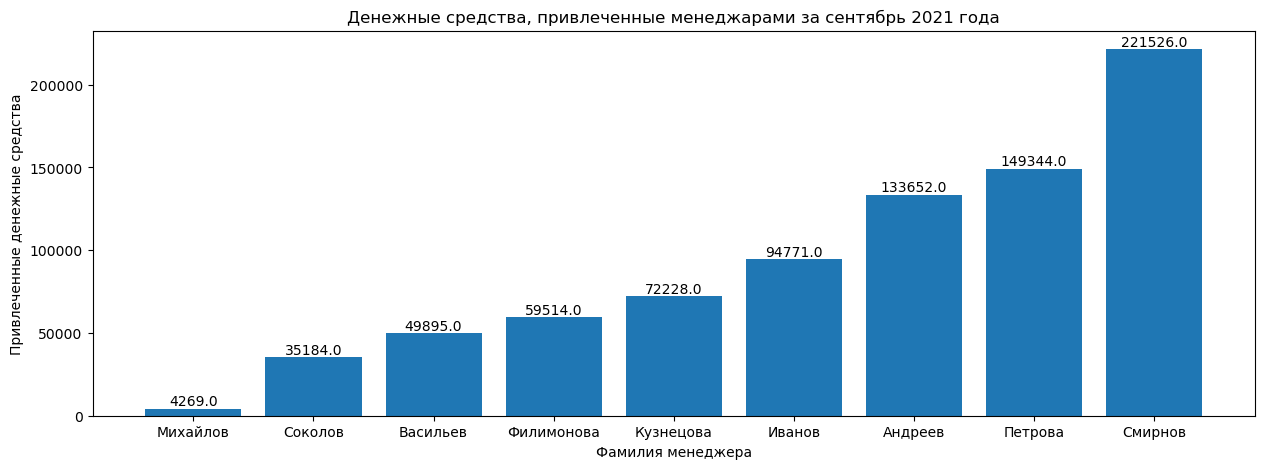

Наибольшее количество денежнех средств привлек менеджер - Смирнов


In [266]:
sum_man = df[df['month'].dt.month == 9].groupby('sale')['sum'].sum().sort_values()
plt.figure(figsize = (15, 5))
plt.bar(sum_man.index, sum_man)


plt.title('Денежные средства, привлеченные менеджарами за сентябрь 2021 года')
plt.xlabel('Фамилия менеджера')
plt.ylabel('Привлеченные денежные средства')
for i, value in zip(sum_man.index, sum_man.values):
    plt.text(i, value, str(value.round()), ha='center', va='bottom')
plt.show()
print(f'Наибольшее количество денежнех средств привлек менеджер - {sum_man.idxmax()}')

## 4. Какой тип сделок (новая/текущая) был преобладающим в октябре 2021?

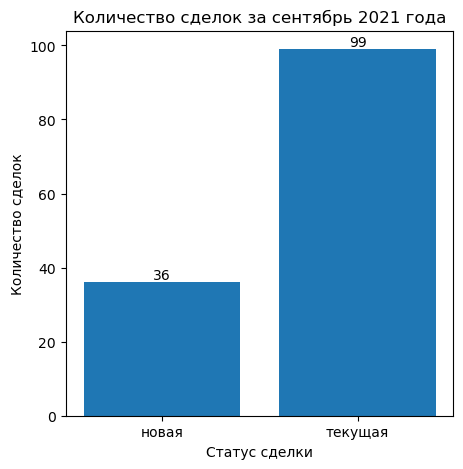

Наибольшее количество сделок - 99 - имеют статус "текущая"


In [268]:
count_deal = df[df['month'].dt.month == 10].groupby('new/current')['client_id'].count()
plt.figure(figsize = (5, 5))
plt.bar(count_deal.index, count_deal)
plt.title('Количество сделок за сентябрь 2021 года')
plt.xlabel('Статус сделки')
plt.ylabel('Количество сделок')
for i, value in zip(count_deal.index, count_deal.values):
    plt.text(i, value, str(value), ha='center', va='bottom')
plt.show()
print(f'Наибольшее количество сделок - {count_deal.max()} - имеют статус "{count_deal.idxmax()}"')

## 5. Сколько оригиналов договора по майским сделкам было получено в июне 2021?

In [271]:
count_con = len(df[(df['month'].dt.month == 5) & (df['document'] == 'оригинал') & (df['receiving_date'].dt.month == 6)])
print(f'Количество договоров: {count_con}')

Количество договоров: 76


# Задание

За каждую заключенную сделку менеджер получает бонус, который рассчитывается следующим образом.

1) За новые сделки менеджер получает 7 % от суммы, при условии, что статус оплаты «ОПЛАЧЕНО», а также имеется оригинал подписанного договора с клиентом (в рассматриваемом месяце).
2) За текущие сделки менеджер получает 5 % от суммы, если она больше 10 тыс., и 3 % от суммы, если меньше. При этом статус оплаты может быть любым, кроме «ПРОСРОЧЕНО», а также необходимо наличие оригинала подписанного договора с клиентом (в рассматриваемом месяце).
   
Бонусы по сделкам, оригиналы для которых приходят позже рассматриваемого месяца, считаются остатком на следующий период, который выплачивается по мере прихода оригиналов. Вычислите остаток каждого из менеджеров на 01.07.2021.

In [292]:
df['7%'] = (0.07 * df.loc[(df['new/current'] == 'новая') & (df['status'] == 'ОПЛАЧЕНО') 
                          & (df['document'] == 'оригинал'), 'sum'])
df['5%'] = (0.05 * df.loc[(df['new/current'] == 'текущая') & (df['status'] != 'ПРОСРОЧЕНО')
                          & (df['document'] == 'оригинал') & (df['sum'] >= 10000), 'sum'])
df['3%'] = (0.03 * df.loc[(df['new/current'] == 'текущая') & (df['status'] != 'ПРОСРОЧЕНО')
                          & (df['document'] == 'оригинал') & (df['sum'] < 10000), 'sum'])

bonus = df[(df['month'].dt.month < 7) & (df['receiving_date'].dt.month >= 7)].groupby('sale')[['7%', '5%', '3%']].sum()
bonus_sum = bonus.sum(axis = 1)
print('Остаток на 01.07.2021:')
for i in bonus_sum.index:
    print(f'{i} - {bonus_sum[i].round(2)}')


Остаток на 01.07.2021:
Андреев - 3945.83
Васильев - 1037.05
Иванов - 5991.45
Кузнецова - 4496.95
Петрова - 10770.75
Селиванов - 5297.69
Смирнов - 6430.27
Соколов - 269.21
Филимонова - 2317.96
